Simple Naive bayes NLP model used for predicting customer review rating out of 5 based on review text

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.feature_extraction.text as txt
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
import sklearn.naive_bayes as nb
import numpy as np

In [2]:
df = pd.read_csv("G:\My Projects\womensfashion\WomensClothingE-CommerceReviews.csv")

In [3]:
print(df.head())
print("")
print("data frame dimensions")
print(df.shape)

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

Observing the columns of the data set, it appears they're are two potentials for NLP based classification, title and review text.

In [4]:
print(df.isnull().sum())

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


Title appears to have the largest number of missing values, initial models will take review text into account only. Columns with no value in the review text will be dropped

In [5]:
df.dropna(subset=['Review Text'], inplace = True)

In [6]:
df = df[['Rating', 'Review Text']]

In [7]:
print(df.head())

   Rating                                        Review Text
0       4  Absolutely wonderful - silky and sexy and comf...
1       5  Love this dress!  it's sooo pretty.  i happene...
2       3  I had such high hopes for this dress and reall...
3       5  I love, love, love this jumpsuit. it's fun, fl...
4       5  This shirt is very flattering to all due to th...


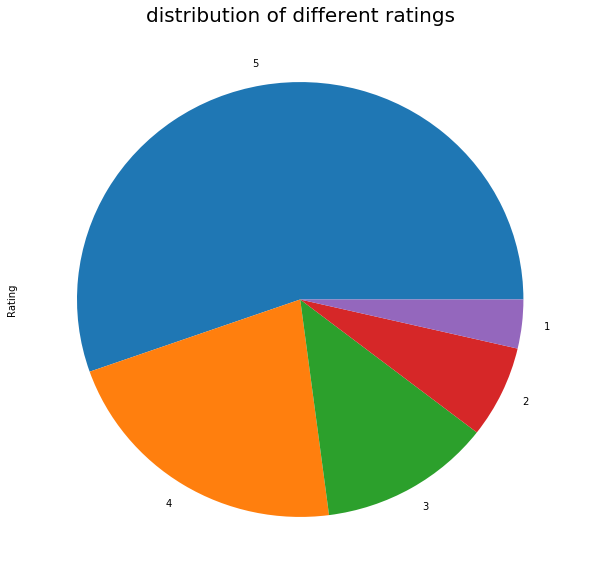

In [8]:
plt.figure(figsize = (10,10))
df['Rating'].value_counts().plot(kind = 'pie')
plt.title('distribution of different ratings', fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

Majority of reviews have been positive, with over 75% being either 4 or 5 star ratings

In [9]:
y = df['Rating']

tf = txt.TfidfVectorizer()
X = tf.fit_transform(df['Review Text'])
print(X.shape)

(22641, 14145)


22641 unique reviews made up of 14145 unique words

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
bnb = ms.GridSearchCV(
    nb.BernoulliNB(),
    param_grid={'alpha': np.logspace(-2., 2., 50)})
bnb.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-02, 1.20679e-02, 1.45635e-02, 1.75751e-02, 2.12095e-02,
       2.55955e-02, 3.08884e-02, 3.72759e-02, 4.49843e-02, 5.42868e-02,
       6.55129e-02, 7.90604e-02, 9.54095e-02, 1.15140e-01, 1.38950e-01,
       1.67683e-01, 2.02359e-01, 2.44205e-01, 2.94705e-01, 3.55... 3.23746e+01, 3.90694e+01,
       4.71487e+01, 5.68987e+01, 6.86649e+01, 8.28643e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
print(bnb.score(x_test, y_test))

0.6047692647383528


In [13]:
names = np.asarray(tf.get_feature_names())
print(','.join(names[np.argsort(
    bnb.best_estimator_.coef_[0, :])[::-2][:50]]))


the,it,to,in,was,of,so,for,very,my,fabric,dress,with,are,back,just,all,had,when,looks,even,you,one,wear,if,way,really,much,there,looked,up,shirt,cute,because,love,color,get,could,didn,off,which,these,first,will,large,great,what,flattering,picture,them


In [14]:
print(bnb.predict(tf.transform([
    "Love it! can't believe how great I look in this dress"
])))

[5]


Seems a reasonable prediction given the input